In [0]:
#three things I'll do here: 
#classifying movie reviws as positive or negative (binary classification)
#classifying news wires by topic (multi-class classification)
#estimating the price of a house, given real-estate data (regression)

In [1]:
#had to do this to prevent numpy from showing pickle error 
!pip install numpy==1.16.1
import numpy as np

     |████████████████████████████████| 17.3MB 3.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


In [1]:
#import tensorflow from another place here beta 2.0
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow==2.0.0-alpha0
import tensorflow as tf

     |████████████████████████████████| 79.9MB 1.3MB/s 
     |████████████████████████████████| 419kB 29.5MB/s 
     |████████████████████████████████| 61kB 20.3MB/s 
     |████████████████████████████████| 3.0MB 31.9MB/s 


In [0]:
layers = tf.keras.layers
mnist = tf.keras.datasets.mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
models = tf.keras.models
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(10, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

In [0]:
optimizers = tf.keras.optimizers

In [0]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='mse',
             metrics=['accuracy'])https://bit.ly/2WCvgas

In [0]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1]* train_images.shape[2]).astype('float32')/255

In [0]:
to_categorical = tf.keras.utils.to_categorical

In [0]:
train_labels = to_categorical(train_labels)

In [0]:
model.fit(train_images, train_labels, batch_size=32, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0235 - accuracy: 0.8472
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0136 - accuracy: 0.9122
Epoch 3/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0122 - accuracy: 0.9211
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0115 - accuracy: 0.9250
Epoch 5/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0110 - accuracy: 0.9289
Epoch 6/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0106 - accuracy: 0.9316
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0104 - accuracy: 0.9334
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0101 - accuracy: 0.9357
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0099 - accuracy: 0.9362
Epoch 10/10
60000/60000 [============

In [0]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_lables) = imdb.load_data(num_words = 10000)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def vectorize_sequences(sequences, dimensions =10000):
  results = np.zeros((len(sequences), dimensions)) #creates an all zero matric of shape 
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_lables).astype('float32')

In [0]:
y_train = np.asarray(y_train).astype('float32')

In [0]:
y_test = np.asarray(y_test).astype('float32')

In [0]:
models = tf.keras.models
layers = tf.keras.layers
model = models.Sequential() #why do we need to define a sequential model type here? 

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
losses = tf.keras.losses
metrics = tf.keras.metrics
optimizers = tf.keras.optimizers


In [0]:
#separate a validation set of 10k samples
x_val = x_train[:10000]
y_val = y_train[:10000]
x_train_partial = x_train[10000:]
y_train_partial = y_train[10000:]

In [0]:
history = model.fit(x_train_partial, y_train_partial, epochs=5, batch_size=28, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 6s 369us/sample - loss: 0.3441 - accuracy: 0.8602 - val_loss: 0.3431 - val_accuracy: 0.8601
Epoch 2/5
15000/15000 [==============================] - 5s 350us/sample - loss: 0.2053 - accuracy: 0.9216 - val_loss: 0.2843 - val_accuracy: 0.8877
Epoch 3/5
15000/15000 [==============================] - 5s 355us/sample - loss: 0.1621 - accuracy: 0.9383 - val_loss: 0.3103 - val_accuracy: 0.8851
Epoch 4/5
15000/15000 [==============================] - 6s 378us/sample - loss: 0.1335 - accuracy: 0.9521 - val_loss: 0.3526 - val_accuracy: 0.8798
Epoch 5/5
15000/15000 [==============================] - 5s 337us/sample - loss: 0.1124 - accuracy: 0.9604 - val_loss: 0.3769 - val_accuracy: 0.8795


In [0]:
#this is for test, no need to run this one
model2 = models.Sequential() #why do we need to define a sequential model type here? 

model2.add(layers.Dense(100, activation='tanh', input_shape=(10000,)))
#model2.add(layers.Dense(32, activation='tanh'))
model2.add(layers.Dense(25, activation='tanh'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='rmsprop', metrics=['acc'], loss = 'mse')
history2 = model2.fit(x_train_partial, y_train_partial, epochs=4, batch_size=64, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 17s 1ms/sample - loss: 0.1074 - acc: 0.8482 - val_loss: 0.0873 - val_acc: 0.8778
Epoch 2/4
15000/15000 [==============================] - 17s 1ms/sample - loss: 0.0564 - acc: 0.9260 - val_loss: 0.0885 - val_acc: 0.8824
Epoch 3/4
15000/15000 [==============================] - 16s 1ms/sample - loss: 0.0406 - acc: 0.9466 - val_loss: 0.0941 - val_acc: 0.8780
Epoch 4/4
15000/15000 [==============================] - 17s 1ms/sample - loss: 0.0296 - acc: 0.9631 - val_loss: 0.1061 - val_acc: 0.8657


In [0]:
history_dict = history.history
history_dict2 = history2.history

In [0]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

In [0]:
history_dict2.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [0]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
acc2 = history_dict2['acc']
val_acc2 = history_dict2['val_acc']

In [0]:
epochs = range(1, len(acc)+1)

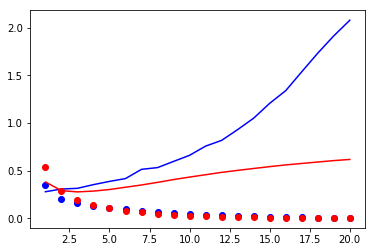

In [0]:
plt.clf()
plt.plot(epochs, val_loss_values, 'b', label='Validation_loss')
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, loss_values2, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values2, 'r', label='Validation_Loss')


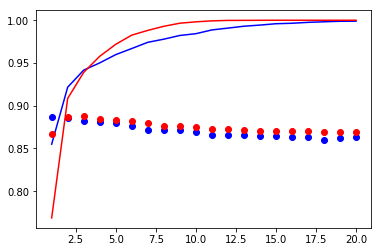

In [0]:
plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'bo')
plt.plot(epochs, acc2, 'r')
plt.plot(epochs, val_acc2, 'ro')

In [0]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 121us/sample - loss: 0.4080 - accuracy: 0.8654


In [0]:
results2 = model2.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 127us/sample - loss: 0.3341 - acc: 0.8734


In [0]:
results3 = model2.evaluate(x_test, y_test)

25000/25000 [==============================] - 5s 193us/sample - loss: 0.3218 - acc: 0.8766


In [0]:
model.predict(x_test)

array([[0.13209671],
       [0.99999547],
       [0.994397  ],
       ...,
       [0.0529477 ],
       [0.03041816],
       [0.47946468]], dtype=float32)

In [0]:
model2.predict(x_test)

array([[0.24758795],
       [0.999691  ],
       [0.95707405],
       ...,
       [0.11489442],
       [0.19282195],
       [0.53046036]], dtype=float32)

In [0]:
#starting example 3.5 onwards

In [0]:
from keras.datasets import reuters

Using TensorFlow backend.


In [0]:
retuers = tf.keras.datasets.reuters

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[5]])

557056/550378 [==============================] - 0s 0us/step


In [0]:
decoded_newswire

"? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3"

In [0]:
def vectorize_sequences(sequence, dimensions=10000):
  results = np.zeros((len(sequence),dimensions))
  for idx, item in enumerate(sequence):
    results[idx, item] = 1.
  return results

In [0]:
train_x = vectorize_sequences(train_data, dimensions=10000)
train_y = np.array(train_labels)

test_x = vectorize_sequences(test_data, dimensions=10000)
test_y = np.array(test_labels)

In [0]:
to_categorical = tf.keras.utils.to_categorical
models = tf.keras.models
layers = tf.keras.layers


In [102]:
train_y

array([ 3,  4,  3, ..., 25,  3, 25])

In [0]:
#tryin another sequential model 
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [104]:
history = model.fit(train_x[:7000], train_y[:7000], epochs=20, batch_size=32, validation_data = (train_x[7000:], train_y[7000:]))

Train on 7000 samples, validate on 1982 samples
Epoch 1/20
7000/7000 [==============================] - 4s 604us/sample - loss: 1.5059 - acc: 0.6736 - val_loss: 1.0781 - val_acc: 0.7654
Epoch 2/20
7000/7000 [==============================] - 4s 536us/sample - loss: 0.7670 - acc: 0.8344 - val_loss: 0.9641 - val_acc: 0.7936
Epoch 3/20
7000/7000 [==============================] - 4s 525us/sample - loss: 0.4811 - acc: 0.8961 - val_loss: 0.9166 - val_acc: 0.8068
Epoch 4/20
7000/7000 [==============================] - 4s 528us/sample - loss: 0.3204 - acc: 0.9331 - val_loss: 1.0228 - val_acc: 0.8002
Epoch 5/20
7000/7000 [==============================] - 4s 523us/sample - loss: 0.2417 - acc: 0.9497 - val_loss: 1.0312 - val_acc: 0.8138
Epoch 6/20
7000/7000 [==============================] - 4s 555us/sample - loss: 0.1932 - acc: 0.9556 - val_loss: 1.2863 - val_acc: 0.7830
Epoch 7/20
7000/7000 [==============================] - 4s 538us/sample - loss: 0.1738 - acc: 0.9577 - val_loss: 1.2455 - va

In [0]:
import copy 
test_copy = copy.copy(test_labels)
np.random.shuffle(test_copy)
hits_array = np.array(test_labels) == np.array(test_copy)
float(np.sum(hits_array))/len(hits_array)

0.1803205699020481

In [0]:
a = np.random.randint(46, size=100)
b = copy.copy(a)
np.random.shuffle(b)
np.sum(a==b)/len(a)

0.01

In [106]:
#Information bottleneck
#model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
#model.add(layers.Dense(, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(train_x[:7000], train_y[:7000], epochs=20, batch_size=32, validation_data = (train_x[7000:], train_y[7000:]))

Train on 7000 samples, validate on 1982 samples
Epoch 1/20
7000/7000 [==============================] - 4s 579us/sample - loss: 3.2739 - acc: 0.2120 - val_loss: 2.3380 - val_acc: 0.2270
Epoch 2/20
7000/7000 [==============================] - 4s 557us/sample - loss: 1.6047 - acc: 0.5447 - val_loss: 1.7677 - val_acc: 0.5706
Epoch 3/20
7000/7000 [==============================] - 4s 550us/sample - loss: 1.2516 - acc: 0.6583 - val_loss: 1.8617 - val_acc: 0.6261
Epoch 4/20
7000/7000 [==============================] - 4s 550us/sample - loss: 1.1315 - acc: 0.7177 - val_loss: 1.8871 - val_acc: 0.6246
Epoch 5/20
7000/7000 [==============================] - 4s 548us/sample - loss: 1.0297 - acc: 0.7190 - val_loss: 2.0654 - val_acc: 0.6186
Epoch 6/20
7000/7000 [==============================] - 4s 542us/sample - loss: 0.9596 - acc: 0.7254 - val_loss: 2.2936 - val_acc: 0.6256
Epoch 7/20
7000/7000 [==============================] - 4s 549us/sample - loss: 0.9127 - acc: 0.7407 - val_loss: 2.2350 - va

In [0]:
np.max(np.bincount(test_labels))/len(test_labels)

0.3619768477292965

In [110]:
#import the housing dataset
boston_housing = tf.keras.datasets.boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [111]:
train_data.shape

(404, 13)

In [112]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [114]:
test_labels.shape

(2246,)

In [115]:
test_targets.shape

(102,)

In [10]:
boston_housing = tf.keras.datasets.boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
def min_max_normalize(m_matrix):
  #mean = m_matrix.mean(axis=0)
  
  max_s = m_matrix.max(axis=0)
  min_s = m_matrix.min(axis=0)
  range_s = max_s - min_s
  return (m_matrix-min_s)/(range_s)

In [0]:
def standard_dev_normalize(m_matrix):
  mean_s = np.mean(m_matrix, axis=0)
  std_s = np.std(m_matrix, axis=0)
  return (m_matrix-mean_s)/std_s

In [0]:
import numpy as np


In [0]:
mean_s = train_data.mean(axis=0)
train_data -= mean_s
std_s = train_data.std(axis=0)
train_data /= std_s

In [0]:
#never use the test data, skin in the game
test_data -= mean_s
test_data /= std_s

In [0]:
models = tf.keras.models
layers = tf.keras.layers

In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(13, )))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='adam', metrics=['mae'], loss='mse')
  return model

In [0]:
model = build_model()
#model.compile(optimizer='adam', metrics=['mae'], loss='mae')
history = model.fit(train_data, train_targets, epochs=100, batch_size=32)

In [0]:
#as above continued training has led to a sharp decrease in training loss and mae but has overfitted to the test data 
#import numpy as np 
k = 4 
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []

In [81]:
for i in range(k):
  print('Processing fold #', i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]
  #print(val_data.shape, val_labels.shape)
  
  partial_train_data = np.concatenate([train_data[:i*num_val_samples], 
                                     train_data[(i+1)*num_val_samples:]], axis=0)
  #print(partial_train_data.shape)
  partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                        train_targets[(i+1)*num_val_samples:]], axis=0)
  model = build_model() #its important to build model here, or should we simply have to compile it? 
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae  = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)
  
  

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [112]:
#writing from scratch for k = 10 
k = 4
num_val_samples = len(train_data)//k
#all_scores_2 = []
all_mae_histories = []

for i in range(k):
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_target = train_targets[i*num_val_samples:(i+1)*num_val_samples]
  print('val', val_data.shape, val_target.shape)
  print('val starting: ending', i*num_val_samples, (i+1)*num_val_samples)
  p_train_data = np.concatenate([train_data[:i*num_val_samples],
                                 train_data[(i+1)*num_val_samples:]], 
                                axis=0)
  print('train_starting:ending',[0, i*num_val_samples, 
                                                (i+1)*num_val_samples, len(train_data
                                                                                 )])
  p_train_target = np.concatenate([train_targets[:i*num_val_samples],
                                  train_targets[(i+1)*num_val_samples:]], 
                                  axis=0)
  print('partial_train', p_train_data.shape, p_train_target.shape)
  
  model = build_model()
  history = model.fit(p_train_data, p_train_target,
                     epochs = 500, batch_size=1, verbose=0,
                    validation_data = (val_data, val_target))
  mae_history = history.history['val_mae']
  val_mse, val_mae = model.evaluate(val_data, val_target, verbose=0)
  all_mae_histories.append(mae_history)
  

val (101, 13) (101,)
val starting: ending 0 101
train_starting:ending [0, 0, 101, 404]
partial_train (303, 13) (303,)
val (101, 13) (101,)
val starting: ending 101 202
train_starting:ending [0, 101, 202, 404]
partial_train (303, 13) (303,)
val (101, 13) (101,)
val starting: ending 202 303
train_starting:ending [0, 202, 303, 404]
partial_train (303, 13) (303,)
val (101, 13) (101,)
val starting: ending 303 404
train_starting:ending [0, 303, 404, 404]
partial_train (303, 13) (303,)


In [0]:
s%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
all_mae_histories

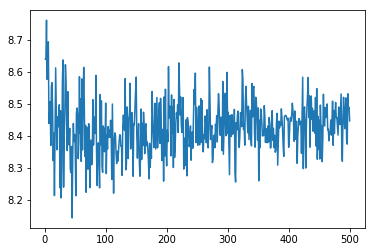

In [106]:
average_mae_history = np.mean(all_mae_histories, axis=0)
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)

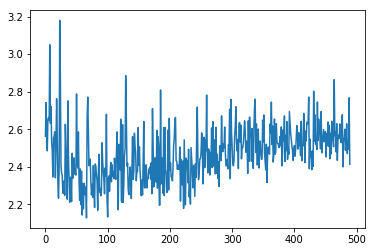

In [92]:
plt.clf()
plt.plot(all_mae_histories[-1][10:])

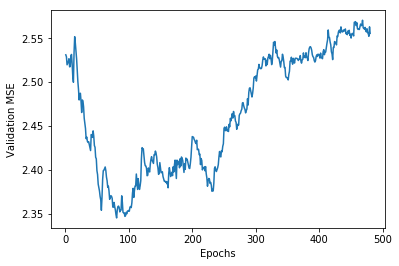

In [103]:
#plotting validation scores, excluding first 10 data points
def smooth_curve(points, factor=0.95):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point) #for the first one
  return smoothed_points
  
smooth_mae_history = smooth_curve(all_mae_histories[-1][20:])
plt.clf()
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [113]:
#train_test on the final model 
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 568us/sample - loss: 17.4067 - mae: 2.6120
